## Testing methods of LinearRegression class: OLS

OLS equation (inversion)
OLSfit: [4.01769656 2.97384034]
OLSequ: [4.01769656 2.97384034]

My GD:
GD: [4.01769656 2.97384034]
fitGD: [4.01769656 2.97384034]
My SGD:
SGD: [4.02636443 3.0018771 ]
fitSGD: [3.97707293 3.01700958]
sgdreg from scikit
GD_SK: [4.00392984 2.97795962]
fitSGD_SK: [4.07433711 3.04343218]
4.017696555177451
1.9869980541301486


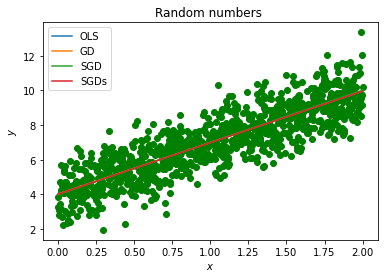

In [8]:
import dataset
import regression

%matplotlib inline

# Importing various packages
from math import exp, sqrt
from random import random, seed
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

degree=1
n = 1000
x = np.reshape(np.sort(2*np.random.rand(n)), (n,1))
y = 4+3*x**degree+np.random.randn(n,1)

scale=False

X = np.c_[np.ones((n,1)), x]

############ Prepare my model
model=regression.OLSRegression(X,y.ravel())
intercept = model.split().fit()[0]
std = np.std(model.y_train)


if scale: 
    model.rescale()

X_train=model.X_train
y_train=model.y_train#.reshape(-1,1)

########### 1) Normal equation #############################
beta_linreg = np.linalg.pinv(X_train.T @ X_train) @ (X_train.T @ y_train)
############ Test my OLS equation
beta_linreg_my = model.fit()

print("OLS equation (inversion)")
print("OLSfit:", beta_linreg_my)
print("OLSequ:", beta_linreg)

########### 2) GD #############################

theta_GD = np.random.randn(X_train.shape[1])
eta = 0.1
Niterations = 1000

for iter in range(Niterations):
    gradients = 2.0/n * X_train.T @ ((X_train @ theta_GD) - y_train)
    theta_GD -= eta*gradients
  
print()
theta_GD_my = model.fitGD(eta=eta, Niterations=Niterations)
print("My GD:")
print("GD:", theta_GD)
print("fitGD:", theta_GD_my)


########### 3) SGD my #############################
n_epochs = 50
M = 5   #size of each minibatch
m = int(n/M) #number of minibatches
t0, t1 = 5, 50

def learning_schedule(t):
    return t0/(t+t1)

theta_SGD = np.random.randn(X_train.shape[1])

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_train[random_index:random_index+1]
        yi = y_train[random_index:random_index+1]
        gradients = 2.0 * xi.T @ ((xi @ theta_SGD)-yi)
        eta = learning_schedule(epoch*m+i)
        theta_SGD = theta_SGD - eta*gradients
        
theta_SGD_my = model.fitSGD(n_epochs,m,t0,t1)
print("My SGD:")
print("SGD:", theta_SGD)
print("fitSGD:", theta_SGD_my)

########### 4) SGD_SK ##################################
sgdreg = SGDRegressor(max_iter = 500, penalty=None, eta0=0.1,fit_intercept=False)
sgdreg.fit(X, y.ravel())
print("sgdreg from scikit")

beta_SGDs = sgdreg.coef_
if scale: # activati if rescale() on
    beta_SGDs[0] = sgdreg.intercept_
            
beta_SGDs_my = model.fitSGD_SK(max_iter = 500, penalty=None, eta0=0.1)
print("GD_SK:", beta_SGDs)
print("fitSGD_SK:", beta_SGDs_my)





if scale:
    y=y-intercept
plt.plot(x, y ,'go') 

"""
std_x=np.std(x)
m_x=np.mean(x)
scaler_X = StandardScaler()
scaler_X.fit(x)
x = scaler_X.transform(x)

m_y=np.mean(y)
std_y=np.std(y)
scaler_y = StandardScaler()
y2 = scaler_y.fit_transform(y.reshape(-1, 1)) #scaler_y.fit_transform(y_train) #"""

print(intercept)
print(std)

xnew = np.array([[0],[2]])
Xnew = np.c_[np.ones((2,1)), xnew]
ypredict = X.dot(theta_GD)
ypredict2 = X.dot(beta_linreg)
ypredict3 = X.dot(theta_SGD_my)
ypredict4 = X.dot(beta_SGDs)
plt.plot(x, ypredict2, label = "OLS")
plt.plot(x, ypredict, label = "GD")
plt.plot(x, ypredict3, label = "SGD")
plt.plot(x, ypredict4, label = "SGDs")


#plt.plot(m_x*std_x, m_y+y2.ravel()*std_y ,'ro')
#plt.axis([0,2.0,0, 15.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Random numbers ')
plt.legend()
plt.show()

Perfect for simple linear regression... but for more complex polynomial??

OLS equation (inversion)
OLSfit: [ 3.92090792  0.30946829 -0.29186336  3.09062034]
OLSequ: [ 3.92090792  0.30946829 -0.29186336  3.09062034]

My GD:
GD: [-2.68441700e+114 -4.06199537e+114 -6.58766932e+114 -1.10921236e+115]
fitGD: [-1.82724545e+273 -2.76494396e+273 -4.48413523e+273 -7.55025482e+273]
My SGD:
SGD: [   550916.15002337  17991134.14170243 -32878199.56454102
  12720477.93555431]
fitSGD: [-3.30435396e+08 -3.90370528e+08  1.71022396e+09 -7.90987489e+08]
sgdreg from scikit
SGD_SK: [ 3.70336306  0.90329822 -1.01849726  3.14901497]
fitSGD_SK: [ 3.98034428 -0.01338516  0.06966106  2.97970655]
3.920907919604179
6.9187632189565855


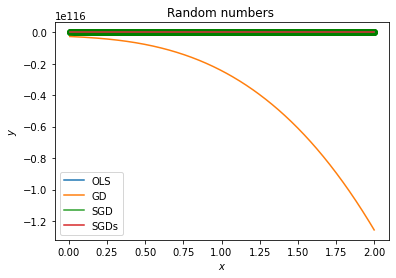

In [9]:
import dataset
import regression

%matplotlib inline

# Importing various packages
from math import exp, sqrt
from random import random, seed
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

degree=3
n = 1000
x = np.reshape(np.sort(2*np.random.rand(n)), (n,1))
y = 4+3*x**degree+np.random.randn(n,1)

scale=False

X = np.c_[np.ones((n,1)), x, x**2, x**3]

############ Prepare my model
model=regression.OLSRegression(X,y.ravel())
intercept = model.split().fit()[0]
std = np.std(model.y_train)

if scale: 
    model.rescale()

X_train=model.X_train
y_train=model.y_train#.reshape(-1,1)

########### 1) Normal equation #############################
beta_linreg = np.linalg.pinv(X_train.T @ X_train) @ (X_train.T @ y_train)
############ Test my OLS equation
beta_linreg_my = model.fit()

print("OLS equation (inversion)")
print("OLSfit:", beta_linreg_my)
print("OLSequ:", beta_linreg)

########### 2) GD #############################

theta_GD = np.random.randn(X_train.shape[1])
eta = 0.1
Niterations = 1000

for iter in range(Niterations):
    gradients = 2.0/n * X_train.T @ ((X_train @ theta_GD) - y_train)
    theta_GD -= eta*gradients
  
print()
theta_GD_my = model.fitGD(eta=eta, Niterations=Niterations)
print("My GD:")
print("GD:", theta_GD)
print("fitGD:", theta_GD_my)


########### 3) SGD my #############################
n_epochs = 50
M = 5   #size of each minibatch
m = int(n/M) #number of minibatches
t0, t1 = 5, 50

def learning_schedule(t):
    return t0/(t+t1)

theta_SGD = np.random.randn(X_train.shape[1])

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_train[random_index:random_index+1]
        yi = y_train[random_index:random_index+1]
        gradients = 2.0 * xi.T @ ((xi @ theta_SGD)-yi)
        eta = learning_schedule(epoch*m+i)
        theta_SGD = theta_SGD - eta*gradients
        
theta_SGD_my = model.fitSGD(n_epochs,m,t0,t1)
print("My SGD:")
print("SGD:", theta_SGD)
print("fitSGD:", theta_SGD_my)

########### 4) SGD_SK ##################################
sgdreg = SGDRegressor(max_iter = 500, penalty=None, eta0=0.1,fit_intercept=False)
sgdreg.fit(X, y.ravel())
print("sgdreg from scikit")

beta_SGDs = sgdreg.coef_
if scale: # activati if rescale() on
    beta_SGDs[0] = sgdreg.intercept_
            
beta_SGDs_my = model.fitSGD_SK(max_iter = 500, penalty=None, eta0=0.1)
print("SGD_SK:", beta_SGDs)
print("fitSGD_SK:", beta_SGDs_my)


if scale:
    y=y-intercept
plt.plot(x, y ,'go') 

"""
std_x=np.std(x)
m_x=np.mean(x)
scaler_X = StandardScaler()
scaler_X.fit(x)
x = scaler_X.transform(x)

m_y=np.mean(y)
std_y=np.std(y)
scaler_y = StandardScaler()
y2 = scaler_y.fit_transform(y.reshape(-1, 1)) #scaler_y.fit_transform(y_train) #"""

print(intercept)
print(std)

xnew = np.array([[0],[2]])
Xnew = np.c_[np.ones((2,1)), xnew]
ypredict = X.dot(theta_GD)
ypredict2 = X.dot(beta_linreg)
ypredict3 = X.dot(theta_SGD_my)
ypredict4 = X.dot(beta_SGDs)
plt.plot(x, ypredict2, label = "OLS")
plt.plot(x, ypredict, label = "GD")
plt.plot(x, ypredict3, label = "SGD")
plt.plot(x, ypredict4, label = "SGDs")


#plt.plot(m_x*std_x, m_y+y2.ravel()*std_y ,'ro')
#plt.axis([0,2.0,0, 15.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Random numbers ')
plt.legend()
plt.show()

If you don't rescale: 
- GD explodes (comment to see next one)
- SGD behaves weirdly (comment to see next one)
- SGDs ok